In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image
import string

In [2]:
import os
# prepering directories
path = os.getcwd()
# subfolders
input_dir = os.path.join(path, 'data')
output_dir = os.path.join(path, 'outputs')

### 1. Open an image using pillow

In [3]:
image = Image.open(os.path.join(input_dir, 'sad-pepe.jfif'))
print('Orginal image dimensions: ', image.size)

Orginal image dimensions:  (500, 438)


### 2. Resize the image using pillow

In [4]:
small_image = image.resize((  int(image.size[0]/3), int(image.size[1]/3)))

### 3. Change the image to a single band, in this case we use greyscale

In [5]:
img = small_image.convert('L')

### 4. Convert a pil object to a NumPy array

In [6]:
img_numpy = np.array(img)

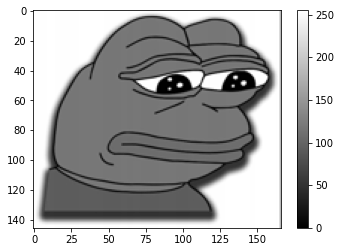

In [7]:
# ploting the array using Matplotlib 
plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.colorbar()

### 5. Convert the numpy array uint8 to float

In [8]:
img_numpy = img_numpy.astype(np.float32)

### 6. Down-scale the image to reduce the number of unique pixels; you need to check what is the best for your image

In [9]:
print('Unique pixels', np.unique(img_numpy))
print('Count of unique pixels:', len(list(np.unique(img_numpy))))

Unique pixels [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 19

In [10]:
img_numpy = (img_numpy * 10)/img_numpy.max()

### 7. Convert back the Numpy array to uint8

In [11]:
img_numpy = img_numpy.astype(np.uint8)

In [12]:
print('Unique pixels', np.unique(img_numpy))
print('Count of unique pixels:', len(list(np.unique(img_numpy))))

Unique pixels [ 0  1  2  3  4  5  6  7  8  9 10]
Count of unique pixels: 11


### 8. Create the list of characters that would replace each of the unique pixels using the 'string' Python library.

In [13]:
# get ascii characters
characters = list(string.printable)
characters = characters[:20]
print(characters)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


### 9. Generate a random list of characters for the image pixels representation


In [14]:
from random import randrange

pixels = []

while len(pixels) < len(list(np.unique(img_numpy))):
    index = randrange(len(characters))
    ch = characters.pop(index)
    pixels.append(ch)

### 10. Convert the NumPy array from the uint8 to string format

In [15]:
unique = list(np.unique(img_numpy))
ascii_numpy = img_numpy.astype(str)

### 11. Using a loop, replace the number representation of colors with ASCII characters.

In [16]:
for index, value in enumerate(unique):
    ascii_numpy[ascii_numpy == str(value)] = pixels[index]

#### 12. Save the NumPy array to a text file

In [17]:
f = open(os.path.join(output_dir, 'sad_pepe.txt'), 'w')
 
text = ''     
for i in range(ascii_numpy.shape[0]):
    row = ' '.join([str(x) for x in ascii_numpy[i]])
    text += row + '\n'
    f.write(row + '\n')
    
f.close()